Original Dataset:
   Student_ID     Name  Math_Score English_Score  Physics_Score
0           1    Alice        78.0            85             88
1           2      Bob        92.0            78             75
2           3  Charlie         NaN            95             92
3           4    David       105.0             A            104
4           5      Eva        88.0            90             87

Cleaned Dataset:
   Student_ID     Name  Math_Score  English_Score  Physics_Score
0           1    Alice       78.00           85.0             88
1           2      Bob       92.00           78.0             75
2           3  Charlie       90.75           95.0             92
3           4    David      105.00            NaN            104
4           5      Eva       88.00           90.0             87

Dataset without Outliers:
   Student_ID     Name  Math_Score  English_Score  Physics_Score
0           1    Alice       78.00           85.0             88
1           2      Bob       92.0

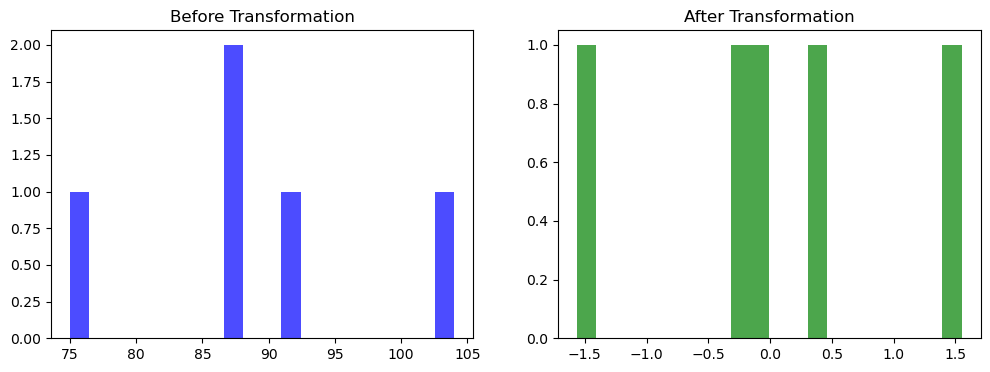

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer

# Step 1: Create a sample "Academic performance" dataset with missing values and inconsistencies
data = {
    'Student_ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Math_Score': [78, 92, np.nan, 105, 88],
    'English_Score': [85, 78, 95, 'A', 90],
    'Physics_Score': [88, 75, 92, 104, 87]
}

df = pd.DataFrame(data)

# Display the original dataset
print("Original Dataset:")
print(df)

# Step 1: Handling missing values and inconsistencies
# Replace missing values with the mean and handle inconsistencies in 'English_Score'
df['Math_Score'].fillna(df['Math_Score'].mean(), inplace=True)
df['English_Score'] = pd.to_numeric(df['English_Score'], errors='coerce')

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df)

# Step 2: Handling outliers using z-score
# Identify and remove outliers in numeric columns (Math_Score and Physics_Score)
numeric_columns = ['Math_Score', 'Physics_Score']
z_scores = np.abs(zscore(df[numeric_columns]))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Display the dataset without outliers
print("\nDataset without Outliers:")
print(df_no_outliers)

# Step 3: Apply data transformations using Power Transformation on 'Physics_Score'
power_transformer = PowerTransformer()
df_no_outliers['Physics_Score_transformed'] = power_transformer.fit_transform(df_no_outliers[['Physics_Score']])

# Display the transformed dataset
print("\nTransformed Dataset:")
print(df_no_outliers[['Student_ID', 'Physics_Score', 'Physics_Score_transformed']])

# Plot histograms before and after transformation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('Before Transformation')
plt.hist(df_no_outliers['Physics_Score'], bins=20, color='blue', alpha=0.7)

plt.subplot(1, 2, 2)
plt.title('After Transformation')
plt.hist(df_no_outliers['Physics_Score_transformed'], bins=20, color='green', alpha=0.7)

plt.show()
